## Analyzing Fandango's Movie Rating

- In October 2015, a data jounalist named `Walt Hickey` from FiveThirtyEight analyzed movie ratings data and found strong evidence that Fandango's rating system was biased and dishonest because it rounds up the actual movie ratings to the nearest half star. 
- Fandango's officials have said that the issue has been fixed which was caused by a bug and it was unintentional.
- Our goal in this project is to analyze more Fandango's recent movie ratings and determine whether the issue has been fixed or not.
- We will use two samples of data: the data in one sample was collected before Hickey's analysis and the other after.

First, we'll start with importing relevant libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read in the data sets
previous_df = pd.read_csv('fandango_score_comparison.csv')
after_df = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
# Printing first 5 rows of previous_df
previous_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
# Printing first 5 rows of after_df
after_df.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
# Checking for null values and data types of columns for any irregularities
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [7]:
after_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [8]:
# Creating copy of isolated columns required for our analysis
H_analysis = previous_df[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()
A_analysis = after_df[['movie','year','fandango']].copy()

In [9]:
# Printing first 5 rows
H_analysis.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [10]:
A_analysis.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


We selected a copy of the required columns from the sample data sets to avoid any `SettingWithCopyWarning`. The population of interest for our goal is all the movies ratings present on the Fandango movie database.

Because the sample datasets are having different dates and criterias, we can't say that we get a data that is randomly sampled. The datasets have been extracted purposely defining two different purposes of tracking whether the Fandango's fix worked or not.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the `README.md` of the [the data set's repository](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that he used the following sampling criteria:
 - The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
 - The movie must have had tickets on sale in 2015.
 
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the `README.md` of the [the data set's repository](https://github.com/fivethirtyeight/data/tree/master/fandango)):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the `README.md` or from the data).
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

# Changing the Goal of our Analysis

At this point, we can either collect new data or change our the goal of our analysis. We are going to choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

# Isolating the Samples We Need

With this new research goal, we have two populations of interest:

1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [11]:
# Randomly selected 10 movies
A_analysis.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As per April 2018, only `Cell` movie released in 2016 had less than 30 fan ratings. This tells us that 90% of the movies are popular and we randomly selected 10 movies. This gives us a little more confidence to go ahead.

We are also going to verify if the Hickey's data also have only popular movies or not.

In [13]:
(H_analysis['Fandango_votes'] < 30).sum()

0

Now, we are going to extract Year from both data sets as both of them contains movies from years 2015 and 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

We'll start with Hickey's data set and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the `FILM` column.

In [17]:
import re

H_analysis['Year'] = H_analysis['FILM'].str.extract(r'\((\d+)\)').astype(int)

In [18]:
H_analysis.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [20]:
# Checking unique values of Year column
H_analysis['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [19]:
# Creating a copy of movies from year 2015
rating_2015 = H_analysis[H_analysis['Year'] == 2015].copy()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [18]:
# Checking the shape of data set
rating_2015.shape

(129, 6)

A_analysis columns already has a `year` column, so we'll isolate from it too.

In [25]:
A_analysis.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [23]:
# Checking unique values of year column
A_analysis['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [24]:
# Isolating by copying popular movies released in 2016
rating_2016 = A_analysis[A_analysis['year'] == 2016]

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [19]:
# Checking the shape after isolating
rating_2016.shape

(191, 3)

## Comparing Distribution Shapes for 2015 and 2016

Our aim is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use [the FiveThirtyEight style](https://www.dataquest.io/blog/making-538-plots/) for the plots.

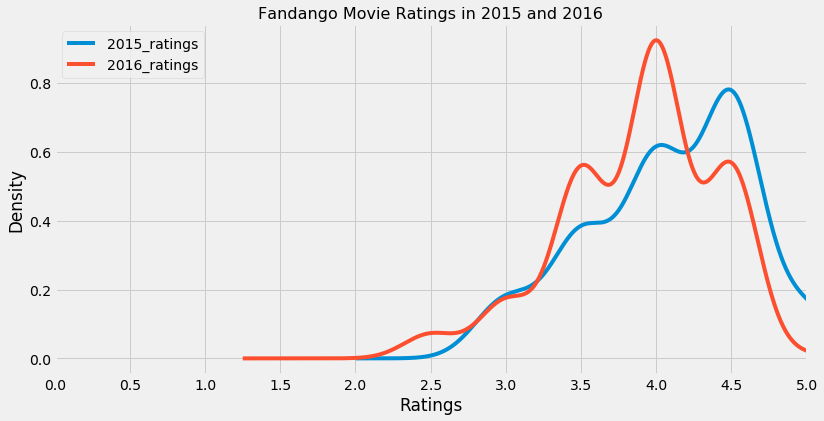

In [27]:
plt.style.use('fivethirtyeight')
rating_2015['Fandango_Stars'].plot.kde(figsize=(12,6), label='2015_ratings')
rating_2016['fandango'].plot.kde(figsize=(12,6), label='2016_ratings')

plt.title('Fandango Movie Ratings in 2015 and 2016', fontsize=16)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

plt.legend()

plt.show()


- The shapes of both the distributions is left skewed or negatively skewed which means maximum ratings are on the higher side.
- Both of them are left skewed but `2016_ratings` are slightly lower as compared to `2015_ratings`. This suggests that the indeed there is a difference between popular movies ratings in 2015 and popular movies ratings in 2016.
- We can also see the direction of the difference: Movies in 2016 are rated lower than movies in 2015.

## Comparing Relative Frequencies

It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.

In [39]:
print('2015', '\n')
rating_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

2015 



3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [40]:
print('2016', '\n')
rating_2016['fandango'].value_counts(normalize=True).sort_index()*100

2016 



2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

# Determining the Direction of the Change

Let's take a couple of summary metrics to get a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [25]:
# Calculating mean of both data sets
mean_2015 = rating_2015['Fandango_Stars'].mean()
mean_2016 = rating_2016['fandango'].mean()

In [26]:
# Calculating median of both data sets
median_2015 = rating_2015['Fandango_Stars'].median()
median_2016 = rating_2016['fandango'].median()

In [42]:
# Calculating mode of both data sets
mode_2015 = rating_2015['Fandango_Stars'].mode()[0]
mode_2016 = rating_2016['fandango'].mode()[0]

In [51]:
# Created a new DataFrame with mean, median, mode of both datasets
summary = pd.DataFrame([[mean_2015,mean_2016],[median_2015,median_2016,],[mode_2015,mode_2016]], columns=['2015','2016'], index=['Mean','Median','Mode'])
summary

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


We can see that the Mean and Mode are less in 2016 relative to in 2015. This gives us a clear picture of direction of the distribution

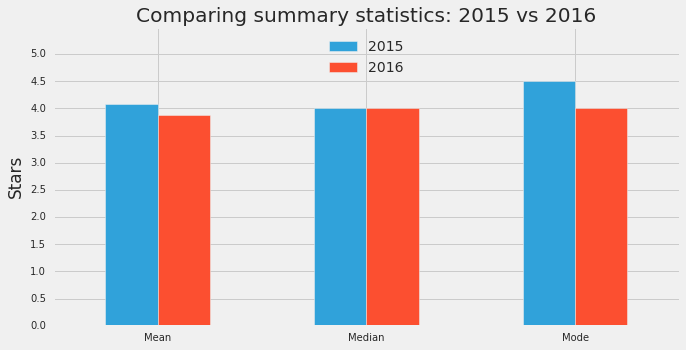

In [89]:
# Plotting a grouped bar graph of summary statistics
plt.style.use('fivethirtyeight')
summary.plot.bar(rot=0, title='Comparing summary statistics: 2015 vs 2016', figsize=(10,5), yticks=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])

plt.ylim(0,5.5)
plt.legend(loc='upper center', fontsize=14.0)
plt.ylabel('Stars')

plt.show()

The magnitude of difference is mean_2016 is slightly lower than mean_2015 with about 5% relative to mean_2015 and the mode is 0.5 less which shows that popular movies in 2016 were rated slightly lower than in 2015.

# Conclusion

Our analysis shows that popular movies in 2016 were rated slightly lower than in 2015 as the average rating is 5% lower in 2016 than that in 2015.

We cannot be completely sure what caused the change, but chances are that Fandango's fixing of the issue did help in fixing the rating system after Hickey's analysis.